This projet is a topic modelling for unsupervised machine learning identity which topic is discussed in a document, called topic modelling social media data analytics.in this projet I will demonstrate several steps or phases: business understanding, data collection & understanding, data (text) preprocessing (feature engineering), descriptive analytics, model building (e.g., classification, topic modeling), and storytelling.

- First thing first, load all the necessary libraries:

In [553]:
# -*- coding: utf-8 -*-
# import packages for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
import numpy as np 
from nltk import FreqDist
# gensim for topic modeling
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

import csv
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# show images
from IPython.display import Image
from IPython.core.display import HTML 

# suppress error messages
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity


## 1 First, data collection and preparation.

- Import fake news Text Data

In [439]:
#Loading Data
df = pd.read_csv('..//Topic_Modeling/hw_kaggle_fake_sample.csv', encoding = "utf8") 
df.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t Benefits,Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? \nHere we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! \nWe’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t Benefits,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fullscreen-capture-10262016-83501-AM.bmp.jpg,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Plead The Fifth?,"Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest! \n100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over payments to Iran…Corrupt to the core! Attorney General Loretta Lynch is declining to comply with an investigation by leading members of Congress about the Obama administration’s secret efforts to send Iran $1.7 billion in cash earlier this year, prompting accusations that Lynch has “pleaded the Fifth” Amendment to avoid incriminating herself over these payments, according to lawmakers and communications exclusively obtained by the Washington Free Beacon. \nSen. Marco Rubio (R., Fla.) and Rep. Mike Pompeo (R., Kan.) initially presented Lynch in October with a series of questions about how the cash payment to Iran was approved and delivered. \nIn an Oct. 24 response, Assistant Attorney General Peter Kadzik responded on Lynch’s behalf, refusing to answer the questions and informing the lawmakers that they are barred from publicly disclosing any details about the cash payment, which was bound up in a ransom deal aimed at freeing several American hostages from Iran. \nThe response from the attorney general’s office is “unacceptable” and provides evidence that Lynch has chosen to “essentially plead the fifth and refuse to respond to inquiries regarding [her]role in providing cash to the world’s foremost state sponsor of terrorism,” Rubio and Pompeo wrote on Friday in a follow-up letter to Lynch. More Related",english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Plead The Fifth?,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fullscreen-capture-10282016-102616-PM.bmp.jpg,0,1,0,0,0,bias


In [440]:
df.shape

(1500, 20)

In [441]:
df.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

- I will be using fake news dataset for this. This version of the dataset contains 1500 observations and 20 columns. This is available on https://www.kaggle.com/mrisdal/fake-news#.


In [442]:
# drop columns 
df.drop(columns =['uuid', 'ord_in_thread', 'author', 'published', 'title',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type']) 

,text
0,Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? \nHere we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! \nWe’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related
1,"Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest! \n100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over payments to Iran…Corrupt to the core! Attorney General Loretta Lynch is declining to comply with an investigation by leading members of Congress about the Obama administration’s secret efforts to send Iran $1.7 billion in cash earlier this year, prompting accusations that Lynch has “pleaded the Fifth” Amendment to avoid incriminating herself over these payments, according to lawmakers and communications exclusively obtained by the Washington Free Beacon. \nSen. Marco Rubio (R., Fla.) and Rep. Mike Pompeo (R., Kan.) initially presented Lynch in October with a series of questions about how the cash payment to Iran was approved and delivered. \nIn an Oct. 24 response, Assistant Attorney General Peter Kadzik responded on Lynch’s behalf, refusing to answer the questions and informing the lawmakers that they are barred from publicly disclosing any details about the cash payment, which was bound up in a ransom deal aimed at freeing several American hostages from Iran. \nThe response from the attorney general’s office is “unacceptable” and provides evidence that Lynch has chosen to “essentially plead the fifth and refuse to respond to inquiries regarding [her]role in providing cash to the world’s foremost state sponsor of terrorism,” Rubio and Pompeo wrote on Friday in a follow-up letter to Lynch. More Related"
2,"Red State : \nFox News Sunday reported this morning that Anthony Weiner is cooperating with the FBI, which has re-opened (yes, lefties: “re-opened”) the investigation into Hillary Clinton’s classified emails. Watch as Chris Wallace reports the breaking news during the panel segment near the end of the show: \nAnd the news is breaking while we’re on the air. Our colleague Bret Baier has just sent us an e-mail saying he has two sources who say that Anthony Weiner, who also had co-ownership of that laptop with his estranged wife Huma Abedin, is cooperating with the FBI investigation, had given them the laptop, so therefore they didn’t need a warrant to get in to see the contents of said laptop. Pretty interesting development. \nTargets of federal investigations will often cooperate, hoping that they will get consideration from a judge at sentencing. Given Weiner’s well-known penchant for lying, it’s hard to believe that a prosecutor would give Weiner a deal based on an agreement to testify, unless his testimony were very strongly corroborated by hard evidence. But cooperation can take many forms — and, as Wallace indicated on this morning’s show, one of those forms could be signing a consent form to allow the contents of devices that they could probably get a warrant for anyway. We’ll see if Weiner’s cooperation extends beyond that. More Related"
3,Email Kayla Mueller was a prisoner and tortured by ISIS while no chance of release…a horrific story. Her father gave a pin drop speech that was so heartfelt you want to give him a hug. Carl Mueller believes Donald Trump will be a great president…Epic speech! 9.0K shares
4,"Email HEALTHCARE REFORM TO MAKE AMERICA G

## 2 Second, text preprocessing and feature engineering.

- You can see many newline characters and extra spaces in the text and it is quite distracting. Let’s get rid of them using regular expressions and stop words.

In [443]:
# convert list to data frame (excel-like)
pd.set_option('display.max_colwidth', -1)
df = pd.DataFrame(df['text'])
df.head()

,text
0,Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? \nHere we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! \nWe’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related
1,"Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest! \n100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over payments to Iran…Corrupt to the core! Attorney General Loretta Lynch is declining to comply with an investigation by leading members of Congress about the Obama administration’s secret efforts to send Iran $1.7 billion in cash earlier this year, prompting accusations that Lynch has “pleaded the Fifth” Amendment to avoid incriminating herself over these payments, according to lawmakers and communications exclusively obtained by the Washington Free Beacon. \nSen. Marco Rubio (R., Fla.) and Rep. Mike Pompeo (R., Kan.) initially presented Lynch in October with a series of questions about how the cash payment to Iran was approved and delivered. \nIn an Oct. 24 response, Assistant Attorney General Peter Kadzik responded on Lynch’s behalf, refusing to answer the questions and informing the lawmakers that they are barred from publicly disclosing any details about the cash payment, which was bound up in a ransom deal aimed at freeing several American hostages from Iran. \nThe response from the attorney general’s office is “unacceptable” and provides evidence that Lynch has chosen to “essentially plead the fifth and refuse to respond to inquiries regarding [her]role in providing cash to the world’s foremost state sponsor of terrorism,” Rubio and Pompeo wrote on Friday in a follow-up letter to Lynch. More Related"
2,"Red State : \nFox News Sunday reported this morning that Anthony Weiner is cooperating with the FBI, which has re-opened (yes, lefties: “re-opened”) the investigation into Hillary Clinton’s classified emails. Watch as Chris Wallace reports the breaking news during the panel segment near the end of the show: \nAnd the news is breaking while we’re on the air. Our colleague Bret Baier has just sent us an e-mail saying he has two sources who say that Anthony Weiner, who also had co-ownership of that laptop with his estranged wife Huma Abedin, is cooperating with the FBI investigation, had given them the laptop, so therefore they didn’t need a warrant to get in to see the contents of said laptop. Pretty interesting development. \nTargets of federal investigations will often cooperate, hoping that they will get consideration from a judge at sentencing. Given Weiner’s well-known penchant for lying, it’s hard to believe that a prosecutor would give Weiner a deal based on an agreement to testify, unless his testimony were very strongly corroborated by hard evidence. But cooperation can take many forms — and, as Wallace indicated on this morning’s show, one of those forms could be signing a consent form to allow the contents of devices that they could probably get a warrant for anyway. We’ll see if Weiner’s cooperation extends beyond that. More Related"
3,Email Kayla Mueller was a prisoner and tortured by ISIS while no chance of release…a horrific story. Her father gave a pin drop speech that was so heartfelt you want to give him a hug. Carl Mueller believes Donald Trump will be a great president…Epic speech! 9.0K shares
4,"Email HEALTHCARE REFORM TO MAKE AMERICA G

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 1 columns):
text    1500 non-null object
dtypes: object(1)
memory usage: 11.8+ KB


In [445]:
df.describe()

,text
count,1500
unique,1352
top,Notify me of follow-up comments by email. Notify me of new posts by email. PLEASE DONATE TO KEEP BARE NAKED ISLAM UP AND RUNNING. Choose DONATE for one-time donation or SUBSCRIBE for monthly donations Payment Options GET ALL NEW BNI POSTS/LINKS ON TWITTER Subscribe to Blog via Email \nEnter your email address to subscribe to this blog and receive notifications of new posts by email. Email Address
freq,11


In [446]:
df['text'].value_counts()

Notify me of follow-up comments by email. Notify me of new posts by email. PLEASE DONATE TO KEEP BARE NAKED ISLAM UP AND RUNNING. Choose DONATE for one-time donation or SUBSCRIBE for monthly donations Payment Options GET ALL NEW BNI POSTS/LINKS ON TWITTER Subscribe to Blog via Email \nEnter your email address to subscribe to this blog and receive notifications of new posts by email. Email Address                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

- a. All major text processing tasks (e.g., tokenization)

In [447]:
#https://stackoverflow.com/questions/37160929/how-to-remove-carriage-return-in-a-dataframe
# r --> regular expression

df['text'] = df['text'].str.replace(r'\n',' ')
df

,text
0,Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? Here we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! We’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related
1,"Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest! 100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over payments to Iran…Corrupt to the core! Attorney General Loretta Lynch is declining to comply with an investigation by leading members of Congress about the Obama administration’s secret efforts to send Iran $1.7 billion in cash earlier this year, prompting accusations that Lynch has “pleaded the Fifth” Amendment to avoid incriminating herself over these payments, according to lawmakers and communications exclusively obtained by the Washington Free Beacon. Sen. Marco Rubio (R., Fla.) and Rep. Mike Pompeo (R., Kan.) initially presented Lynch in October with a series of questions about how the cash payment to Iran was approved and delivered. In an Oct. 24 response, Assistant Attorney General Peter Kadzik responded on Lynch’s behalf, refusing to answer the questions and informing the lawmakers that they are barred from publicly disclosing any details about the cash payment, which was bound up in a ransom deal aimed at freeing several American hostages from Iran. The response from the attorney general’s office is “unacceptable” and provides evidence that Lynch has chosen to “essentially plead the fifth and refuse to respond to inquiries regarding [her]role in providing cash to the world’s foremost state sponsor of terrorism,” Rubio and Pompeo wrote on Friday in a follow-up letter to Lynch. More Related"
2,"Red State : Fox News Sunday reported this morning that Anthony Weiner is cooperating with the FBI, which has re-opened (yes, lefties: “re-opened”) the investigation into Hillary Clinton’s classified emails. Watch as Chris Wallace reports the breaking news during the panel segment near the end of the show: And the news is breaking while we’re on the air. Our colleague Bret Baier has just sent us an e-mail saying he has two sources who say that Anthony Weiner, who also had co-ownership of that laptop with his estranged wife Huma Abedin, is cooperating with the FBI investigation, had given them the laptop, so therefore they didn’t need a warrant to get in to see the contents of said laptop. Pretty interesting development. Targets of federal investigations will often cooperate, hoping that they will get consideration from a judge at sentencing. Given Weiner’s well-known penchant for lying, it’s hard to believe that a prosecutor would give Weiner a deal based on an agreement to testify, unless his testimony were very strongly corroborated by hard evidence. But cooperation can take many forms — and, as Wallace indicated on this morning’s show, one of those forms could be signing a consent form to allow the contents of devices that they could probably get a warrant for anyway. We’ll see if Weiner’s cooperation extends beyond that. More Related"
3,Email Kayla Mueller was a prisoner and tortured by ISIS while no chance of release…a horrific story. Her father gave a pin drop speech that was so heartfelt you want to give him a hug. Carl Mueller believes Donald Trump will be a great president…Epic speech! 9.0K shares
4,"Email HEALTHCARE REFORM TO MAKE AMERICA GREAT AGAIN Since M

In [448]:
#Export to csv
pd.set_option('display.max_colwidth', -1)
df.to_csv("../Topic_Modeling/fakenews1.csv", index=False, encoding="utf-8")
df.head(2)

,text
0,Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? Here we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! We’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related
1,"Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest! 100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over payments to Iran…Corrupt to the core! Attorney General Loretta Lynch is declining to comply with an investigation by leading members of Congress about the Obama administration’s secret efforts to send Iran $1.7 billion in cash earlier this year, prompting accusations that Lynch has “pleaded the Fifth” Amendment to avoid incriminating herself over these payments, according to lawmakers and communications exclusively obtained by the Washington Free Beacon. Sen. Marco Rubio (R., Fla.) and Rep. Mike Pompeo (R., Kan.) initially presented Lynch in October with a series of questions about how the cash payment to Iran was approved and delivered. In an Oct. 24 response, Assistant Attorney General Peter Kadzik responded on Lynch’s behalf, refusing to answer the questions and informing the lawmakers that they are barred from publicly disclosing any details about the cash payment, which was bound up in a ransom deal aimed at freeing several American hostages from Iran. The response from the attorney general’s office is “unacceptable” and provides evidence that Lynch has chosen to “essentially plead the fifth and refuse to respond to inquiries regarding [her]role in providing cash to the world’s foremost state sponsor of terrorism,” Rubio and Pompeo wrote on Friday in a follow-up letter to Lynch. More Related"


In [513]:
# -*- coding: utf-8 -*-
data = []
r = csv.reader(open('..//Topic_Modeling/fakenews1.csv', 'r', errors='ignore'))
#r = csv.reader(open('data/politics2015_gop.csv', 'r', encoding = "ISO-8859-1"))
for i in r:
    data.append(i)  
len(data)

1501

In [480]:
#first two rows
data[0:2]

[['text'],
 ['Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them?  Here we go again â€¦another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months!  Weâ€™ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our systemâ€¦Itâ€™s way out of control! More Related']]

- b. Removing stopwords is important to improve the quality of topic modeling.

In [481]:
# text cleaning using function

def text_pro(texts):
    # Remove useless numbers and alphanumerical words
    documents = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in data]
    texts = [[word for word in text.lower().split() ] for text in documents]

    # stemming words: having --> have; friends --> friend
    lmtzr = WordNetLemmatizer()
    texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]

    #porter_stemmer = PorterStemmer()
    #texts = [[porter_stemmer.stem(word) for word in text ] for text in texts]

    # remove common words 
    stoplist = stopwords.words('english')
    texts = [[word for word in text if word not in stoplist] for text in texts]

    #remove short words
    texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]    
    return texts

In [482]:
# call the function
texts =text_pro(data)

- c. In addition to the standardized list of stopwords, consider removing additional stopwords (e.g., too frequent words, too rare words).

In [483]:
# A list of extra stopwords specific to the debates transcripts (if you want to remove more stopwords)
extra_stopwords = ['will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','something','tell','put','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see']

# remove extra stopwords
extra_stopwords = stopwords.words('english')
texts = [[word for word in text if word not in extra_stopwords] for text in texts]

- d. Save both “dictionary” and “corpus” for future reference

In [454]:
# this is text processing required for topic modeling with Gensim

## Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
dictionary.save('..//Topic_Modeling//fake.dict')  # store the dictionary, for future reference

len(dictionary)

25115

In [455]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step

dictionary.filter_extremes(no_above=5, no_below=0.5)                           #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

25115

In [456]:
# convert words to vetors or integers
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('..//Topic_Modeling//fake.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

1501

In [457]:
print(('Number of unique tokens: %d' % len(dictionary)))
print(('Number of documents: %d' % len(corpus)))

Number of unique tokens: 25115
Number of documents: 1501


In [458]:
# this is text processing required for topic modeling with Gensim
# Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
# convert words to vetors or integers (creating corpus)
corpus = [dictionary.doc2bow(text) for text in texts]

# 3 Third, demonstrate and understanding of probabilistic topic modeling.

- a. Explain the difference between text classification and topic modeling in your own words

Text classification is a supervised machine learning problem, where a text document or article classified into a pre-defined set of classes. Topic modeling is the process of discovering groups of co-occurring words in text documents.
Topic modeling can be used to solve the text classification problem. Topic modeling will identify the topics presents in a document" while text classification classifies the text into a single class.


- b. Explain the goal of topic modeling (LDA) in your own words.
The goal of LDA is mapping each document to a list of topics is assign topics to arrangements of words, e.g. n-grams such as best player for a topic related to sports.


- c. Explain document-topic matrix (distribution) in your own words.
Document-topic distribution is a  decomposition of a document into topics that compose that document.. This is specific to each document in your training corpus.

- d. Explain term-topic matrix (distribution) in your own words.
 Given this topic, what is the distribution over all possible words in the vocabulary? For example, given that you are talking about food, how likely is “pasta” to appear? And what about “bicycle”? Note that: We expect that ‘pasta’ will have a higher probability than ‘bicycle’

# 4. Fourth, building topic models.

- First, let's determine an optimal K value

- a. Determine an optimal number of k using range(6,20,2).

-1.076087003277675
-1.0387285095779473
-1.3266110971570986
-1.428328834300636
-1.7669306522143897
-1.8260308965954566
-2.3651595050036707


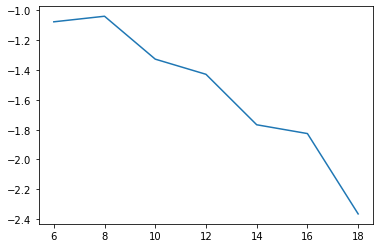

In [459]:
numpy.random.seed(1) # setting random seed to get the same results each time.
k_range = range(6,20,2)
scores = []
for k in k_range:
    LdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    cm = CoherenceModel(model=LdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    print((cm.get_coherence()))
    scores.append(cm.get_coherence())
    
plt.figure()
plt.plot(k_range, scores)

You can easily evaluate this graph. Here, you have a number of topics on X-axis and coherence score on Y-axis. Of the number of topics, 8 have the highest coherence score, so the optimum number of topics are 8.

-b. Report the results of topic modeling

In [460]:
# build a lda topic model (number of topics = 15, passes = 50)
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, passes=50)

In [461]:
# print term-topic distribution
model.show_topics(num_topics=5)

[(0,
  '0.009*"clinton" + 0.006*"trump" + 0.006*"would" + 0.006*"one" + 0.005*"people" + 0.005*"war" + 0.005*"state" + 0.004*"hillary" + 0.004*"american" + 0.004*"time"'),
 (1,
  '0.013*"black" + 0.012*"white" + 0.008*"people" + 0.008*"trump" + 0.006*"obama" + 0.005*"party" + 0.004*"american" + 0.004*"one" + 0.004*"class" + 0.004*"year"'),
 (2,
  '0.006*"said" + 0.005*"force" + 0.005*"city" + 0.004*"isi" + 0.004*"people" + 0.004*"police" + 0.004*"muslim" + 0.004*"syrian" + 0.004*"attack" + 0.003*"government"'),
 (3,
  '0.005*"year" + 0.005*"state" + 0.005*"said" + 0.005*"one" + 0.004*"russia" + 0.004*"government" + 0.004*"also" + 0.003*"would" + 0.003*"time" + 0.003*"russian"'),
 (4,
  '0.015*"clinton" + 0.012*"trump" + 0.008*"election" + 0.008*"said" + 0.008*"email" + 0.006*"hillary" + 0.006*"state" + 0.005*"fbi" + 0.005*"would" + 0.005*"campaign"')]

- c. What are five most popular topics in fake news?

In [585]:
# print words without probability
for i in range(0,5):
    topics = model.show_topic(i, 10)
    print(', '.join([str(word[0]) for word in topics]))

clinton, trump, would, one, people, war, state, hillary, american, time
black, white, people, trump, obama, party, american, one, class, year
said, force, city, isi, people, police, muslim, syrian, attack, government
year, state, said, one, russia, government, also, would, time, russian
clinton, trump, election, said, email, hillary, state, fbi, would, campaign


- Topic 0 includes words like "clinton", "trump", "people", "war," "state", "american", "time", sounds like a topic related to US Presidential Elections. 
- Topic 1 includes words like “black", "white", "people", "trump", "obama", "party", "american" it is definite a US Presidential Elections related topic. 
- Topic 2 includes words like "said", "force", "city', "isi", "people", "police", "muslim", "syrian", "attack", "government" sounds like a middle east war related topic.
- Topic 3 includes words like "year", "state", "said", "one", "russia", "government", "also", "would", "time", "russian" sounds like a russian meddling in us elections related topic.
- Topic 3 includes words like "clinton", "trump", "election", "said", "email", "hillary", "state", "fbi", "would", "campaign" sounds like a clinton email wikileaks in us elections related topic.


-d. Save your topic model for future reference

In [584]:
model.save('..//Topic_Modeling/lda_fake.model') 
# to retrieve
#model = models.LdaModel.load('data/lda_gop.model')

# 5. Fifth, topic model to new data. a list of fake news (3 or 4) 

In [463]:
unlabeled = ["Conspiracy theories have swirled in recent days as to why FBI Director James Comey reopened Hillary's email investigation after just closing it back in July concluding that, although Hillary had demonstrated gross negligence in her establishment of a private email server",
             "The election of climate change skeptic Donald Trump as president is likely to end the U.S. leadership role in the international fight against global warming and may lead to the emergence of a new and unlikely champion: China",
              "The first and most obvious point to be made is that the anti-Russia hysteria that characterized the election, particularly in its final weeks, did not come out of nowhere; in fact, it should be seen as part of a natural progression of the elite mediaâ€™s Russophobia which took root in and around the Ukraine crisis of late 2013-early 2014 and led, almost ineffably, not only to charges of Russian election-rigging in the United States but in the identification, in the pages of Newsweek and the Washington Post , of Russian fifth-columns within the United States. Democratic presidential nominee Hillary Clinton"]

In [464]:
# Remove useless numbers and alphanumerical words
unlabeled = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in unlabeled]
# tokenize & lowercase
unlabeled = [[word for word in text.lower().split() ] for text in unlabeled]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
unlabeled = [[lmtzr.lemmatize(word) for word in text ] for text in unlabeled]
# remove common words
stoplist = stopwords.words('english')
unlabeled = [[word for word in text if word not in stoplist] for text in unlabeled]
# remove short words
unlabeled = [[ word for word in tokens if len(word) >= 3 ] for tokens in unlabeled]

In [465]:
unlabeled[:1]

[['conspiracy',
  'theory',
  'swirled',
  'recent',
  'day',
  'fbi',
  'director',
  'james',
  'comey',
  'reopened',
  'hillary',
  'email',
  'investigation',
  'closing',
  'back',
  'july',
  'concluding',
  'although',
  'hillary',
  'demonstrated',
  'gross',
  'negligence',
  'establishment',
  'private',
  'email',
  'server']]

In [466]:
for i in unlabeled:
    print(model.id2word.doc2bow(i))

[(3, 1), (101, 1), (184, 2), (188, 1), (196, 2), (506, 1), (531, 1), (591, 1), (665, 1), (743, 1), (832, 1), (837, 1), (1623, 1), (2053, 1), (2250, 1), (2253, 1), (2552, 1), (2590, 1), (2650, 1), (3018, 1), (6485, 1), (6495, 1), (6504, 1), (6514, 1)]
[(141, 1), (185, 1), (249, 1), (262, 1), (269, 1), (332, 1), (616, 1), (700, 1), (745, 1), (1061, 1), (1560, 1), (1565, 1), (1714, 1), (2531, 1), (2639, 1), (2672, 1), (2786, 1), (3072, 1), (3247, 1), (3985, 1), (8216, 1), (9483, 1)]
[(87, 1), (149, 2), (154, 1), (172, 1), (196, 1), (407, 1), (439, 1), (444, 1), (477, 1), (496, 1), (522, 1), (554, 1), (557, 1), (621, 1), (630, 1), (663, 1), (708, 1), (712, 1), (721, 1), (744, 1), (745, 2), (774, 1), (994, 1), (1066, 1), (1121, 1), (1125, 1), (1242, 1), (1261, 1), (1340, 1), (1395, 1), (1440, 1), (1445, 2), (2082, 1), (2102, 1), (2104, 1), (2364, 1), (2396, 1), (2397, 2), (2417, 1), (2932, 1), (3527, 1), (3686, 1), (4499, 1), (5773, 1), (7020, 1), (12358, 1), (12980, 1), (17278, 1), (20703,

In [467]:
for i in unlabeled:
    bow = model.id2word.doc2bow(i)
    doc_topics, word_topics, phi_values = model.get_document_topics(
        bow, per_word_topics=True)
    print(doc_topics)

[(4, 0.9699618)]
[(0, 0.9643654)]
[(0, 0.4774127), (4, 0.51118773)]


What is the prevalent topic for unlabeled #1 and #2?

# 6. Sixth, business intelligence, using pivot and charts.

- a. Which topic is most prevalent, based on "document-topic distribution"?

In [468]:
# print document-topic distribution 
lda_corpus = model[corpus]
# first five rows
for i in lda_corpus[:5]:
    print(i)

[(0, 0.100890264), (1, 0.10004082), (2, 0.10004185), (3, 0.5980859), (4, 0.100941174)]
[(0, 0.21968219), (4, 0.76688457)]
[(4, 0.9949627)]
[(4, 0.9936511)]
[(0, 0.82434106), (4, 0.15472862)]


In [469]:
# save document-topic distribution 
lda_corpus = model[corpus]
results = []
for i in lda_corpus:
    results.append(i)
    
results[:5]

[[(0, 0.1008913),
  (1, 0.10004084),
  (2, 0.10004187),
  (3, 0.59808224),
  (4, 0.10094375)],
 [(0, 0.21947326), (4, 0.76708645)],
 [(4, 0.9949623)],
 [(4, 0.9936512)],
 [(0, 0.8243241), (4, 0.15474564)]]

In [470]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
# view first five
toptopic[:5]

[3, 4, 4, 4, 0]

In [515]:
# merge the majority topic information with the original texts
toptopic = pd.DataFrame(toptopic)
dfdata = pd.DataFrame(data)
dfdata = dfdata.rename(columns={0: 'documents'})
summary = dfdata.join(toptopic)
summary.head()

,documents,0
0,text,3
1,Print They should pay all the back all the money plus interest. The entire family and everyone w...,4
2,Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The a...,4
3,Red State : Fox News Sunday reported this morning that Anthony Weiner is cooperating with the F...,4
4,Email Kayla Mueller was a prisoner and tortured by ISIS while no chance of releaseâ€¦a horrific ...,0


In [516]:
# How many documents are assigned to each topic?
# what is the most popular topic in terms of the number of documents assigned
summary[0].value_counts()

4    448
0    430
2    253
3    201
1    169
Name: 0, dtype: int64

In [517]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.062371  0.004195       1        1  27.176020
1      0.075859  0.103302       2        1  16.845299
2     -0.153312  0.051720       3        1  17.211290
3     -0.033157 -0.092287       4        1  14.585711
4      0.048240 -0.066930       5        1  24.181679, topic_info=     Category         Freq     Term        Total  loglift  logprob
907   Default  1124.000000    black  1124.000000  30.0000  30.0000
172   Default  2650.000000  clinton  2650.000000  29.0000  29.0000
889   Default  1127.000000    white  1127.000000  28.0000  28.0000
269   Default  2393.000000    trump  2393.000000  27.0000  27.0000
184   Default   842.000000    email   842.000000  26.0000  26.0000
...       ...          ...      ...          ...      ...      ...
3005   Topic5   253.734695    syria   663.873413   0.4578  -5.9562
210    Topic5   237.878296     news   569.473633   0.5466  -6.0207
43     Topic5   290.845764     year  1372.978760  -0.1324  -5.8197
353    Topic5   280.917145   people  1872.834351  -0.4776  -5.8544
222    Topic5   234.245667      say   747.290771   0.2595  -6.0361

[434 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
157        1  0.022013    abedin
157        4  0.044026    abedin
157        5  0.924540    abedin
714        5  0.944980  absentee
3711       1  0.104085   african
...      ...       ...       ...
6306       1  0.982461     youtu
18914      3  0.957934       ypg
12855      1  0.937353   zionism
5584       3  0.863592      zulu
5584       4  0.132860      zulu

[997 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

- b. which document is most prevalent for each topic? The most representative document for each topic.

The above display shows the correlation between the topics as well as the top most relevant terms for each selected topic (topic 1 in this case). 

In [518]:
# print document-topic distribution 
lda_corpus = model[corpus]
# first five rows
for i in lda_corpus[:5]:
    print(i)

[(0, 0.100889616), (1, 0.10004083), (2, 0.10004186), (3, 0.5980861), (4, 0.10094154)]
[(0, 0.21922795), (4, 0.76733917)]
[(4, 0.99496317)]
[(4, 0.9936512)]
[(0, 0.8243446), (4, 0.1547251)]


In [519]:
def listify(l):
    res = []
    for j in l:
        d = dict([(i, 0) for i in range(15)])  # create a dictionary: use range(15) for 15 topics
        d.update(j)
        #res.append(list(d.items()))  # saving both keys and values
        #res.append(list(d.keys()))   # saving keys 
        res.append(list(d.values()))  # saving values
    return res

In [520]:
z = listify(results)
dtd = pd.DataFrame(z)  # dtd: document topic distribution
dtd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.100891,0.100041,0.100042,0.598082,0.100944,0,0,0,0,0,0,0,0,0,0
1,0.219473,0.000000,0.000000,0.000000,0.767086,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.000000,0.000000,0.000000,0.994962,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.000000,0.000000,0.000000,0.993651,0,0,0,0,0,0,0,0,0,0
4,0.824324,0.000000,0.000000,0.000000,0.154746,0,0,0,0,0,0,0,0,0,0


In [521]:
# for example, we can find out which topic is most prevalent, based on "document-topic distribution"?

#dtd.sum(axis=0)  # find column sum          # axis=1 --> row sum
#dtd.sum(axis=0).sort_values(ascending=False)
dtd.sum(axis=0).sort_values(ascending=False) / len(dtd)   # topic prevalence or popularity

4     0.285433
0     0.259826
2     0.180522
3     0.141681
1     0.128249
14    0.000000
13    0.000000
12    0.000000
11    0.000000
10    0.000000
9     0.000000
8     0.000000
7     0.000000
6     0.000000
5     0.000000
dtype: float64

- c. Word cloud for the most prevalent topic.

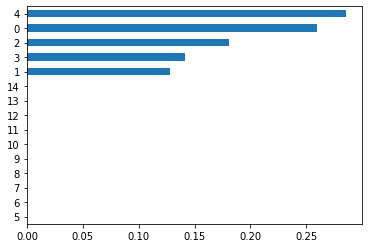

In [522]:
# visualize topic prevalence (from most popular to least popular using horizontal bar)
(dtd.sum(axis=0).sort_values() / len(dtd)).plot(kind ='barh')

In [523]:
dtd[3].idxmax()

82

In [530]:
#pd.set_option('display.max_colwidth', -1)   # show entire data
pd.options.display.max_colwidth = 50
dfdata.loc[dtd[4].idxmax()]

documents    (Before It's News) King of Shambhala also see ...
Name: 1127, dtype: object

In [531]:
# let's combine LDA document topic distribution with the original data
df = dfdata.join(dtd)
df.head()

,documents,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,text,0.100891,0.100041,0.100042,0.598082,0.100944,0,0,0,0,0,0,0,0,0,0
1,Print They should pay all the back all the mon...,0.219473,0.000000,0.000000,0.000000,0.767086,0,0,0,0,0,0,0,0,0,0
2,Why Did Attorney General Loretta Lynch Plead T...,0.000000,0.000000,0.000000,0.000000,0.994962,0,0,0,0,0,0,0,0,0,0
3,Red State : Fox News Sunday reported this mor...,0.000000,0.000000,0.000000,0.000000,0.993651,0,0,0,0,0,0,0,0,0,0
4,Email Kayla Mueller was a prisoner and torture...,0.824324,0.000000,0.000000,0.000000,0.154746,0,0,0,0,0,0,0,0,0,0


In [532]:
# find the index number based on each column max
df.iloc[:,1:].idxmax()

0     1282
1     1300
2     1175
3       82
4     1127
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
dtype: int64

In [533]:
# max value of each column
toptopicprobability = pd.DataFrame(df.iloc[:,1:].max()).rename(columns={0:'toptopic probability'})
toptopicprobability

,toptopic probability
0,0.999655
1,0.999666
2,0.999537
3,0.999693
4,0.999270
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [534]:
# find the index number based on each column max
maxValueIndex = df.iloc[:,1:].idxmax()

topdocuments = [ df['documents'].iloc[i] for i in maxValueIndex ] 
dftopdocuments = pd.DataFrame(topdocuments).rename(columns={0: 'documents'})
dftopdocuments.head()

,documents
0,Tweet Widget by Nathan J. Robinson Bill and H...
1,2016 elections by Robin D.G. Kelley The autho...
2,(Before It's News) Abadi says they enter new p...
3,United States Marine Field McConnell Plum Cit...
4,(Before It's News) King of Shambhala also see ...


In [591]:
topdocumentpertopic = dftopdocuments.join(toptopicprobability).reset_index().rename(columns={'index': 'topic'})
topdocumentpertopic[:4]

,topic,documents,toptopic probability
0,0,Tweet Widget by Nathan J. Robinson Bill and H...,0.999655
1,1,2016 elections by Robin D.G. Kelley The autho...,0.999666
2,2,(Before It's News) Abadi says they enter new p...,0.999537
3,3,United States Marine Field McConnell Plum Cit...,0.999693


- b. which document is most prevalent for each topic? The most representative document for each topic.

In [610]:
pd.pivot_table(df,index=["documents"])[:5]

0         1   \
documents                                                                
                                                    0.200000  0.200000   
     block the US from being stationed on the i...  0.560666  0.000000   
   DAILY CALLER    330,000 Russian troops amass...  0.000000  0.000000   
  A Black Agenda Radio Commentary by Bruce A. D...  0.357002  0.270229   
  Dear Mr. Hodges,  This is to inform you that ...  0.390683  0.000000   

                                                          2         3   \
documents                                                                
                                                    0.200000  0.200000   
     block the US from being stationed on the i...  0.427800  0.010202   
   DAILY CALLER    330,000 Russian troops amass...  0.216894  0.779826   
  A Black Agenda Radio Commentary by Bruce A. D...  0.000000  0.000000   
  Dear Mr. Hodges,  This is to inform you that ...  0.000000  0.000000   

                                                          4   5   6   7   8   \
documents                                                                      
                                                    0.200000   0   0   0   0   
     block the US from being stationed on the i...  0.000000   0   0   0   0   
   DAILY CALLER    330,000 Russian troops amass...  0.000000   0   0   0   0   
  A Black Agenda Radio Commentary by Bruce A. D...  0.371797   0   0   0   0   
  Dear Mr. Hodges,  This is to inform you that ...  0.607464   0   0   0   0   

                                                    9   10  11  12  13  14  
documents                                                                   
                                                     0   0   0   0   0   0  
     block the US from being stationed on the i...   0   0   0   0   0   0  
   DAILY CALLER    330,000 Russian troops amass...   0   0   0   0   0   0  
  A Black Agenda Radio Commentary by Bruce A. D...   0   0   0   0   0   0  
  Dear Mr. Hodges,  This is to inform you that ...   0   0   0   0   0   0

- c. Word cloud for the most prevalent topic.

(-0.5, 399.5, 199.5, -0.5)

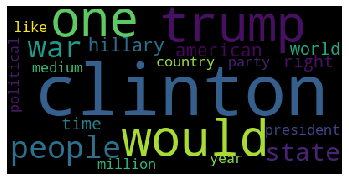

In [592]:
# word cloud for topic 0
plt.figure()
plt.imshow(WordCloud().fit_words(dict(model.show_topic(0,20))))
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

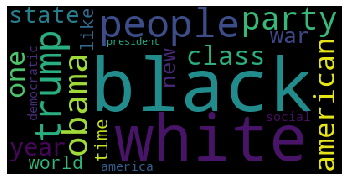

In [593]:
# word cloud for topic 1
plt.figure()
plt.imshow(WordCloud().fit_words(dict(model.show_topic(1,20))))
plt.axis("off")

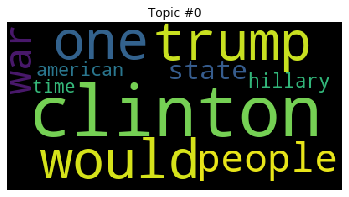

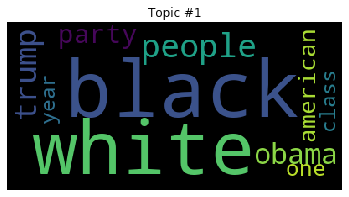

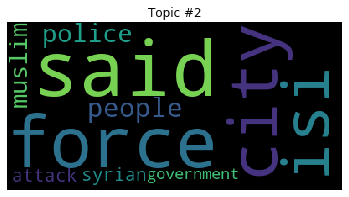

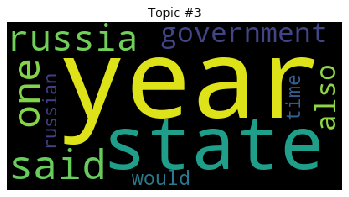

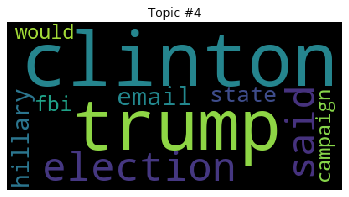

In [595]:
for t in range(model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(model.show_topic(t, 10))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

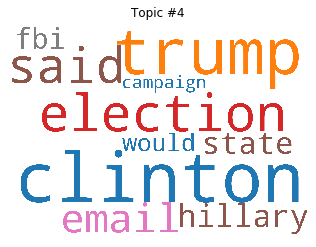

In [596]:
 stoplist = stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
for t in range(model.num_topics):
     plt.figure()
plt.imshow(WordCloud(stopwords=stoplist,
                  background_color='white',
                  width=2500,
                   height=1800,
                  max_words=10,
                  colormap='tab10',
                  prefer_horizontal=1.0).fit_words(dict(model.show_topic(t, 10))))
plt.axis("off")
plt.title("Topic #" + str(t))
plt.show()

# 7. Seventh “storytelling”.

- a. Provide your interpretations of the overall results

   - As I analyze the topics discovered by LDA model, I see that these topics are basically probabilistic word distribution which can very well describe a particular theme or content. After experimenting number of times with fake news articles, I came to a conclusion that words in the modeled topics may not be perfectly similar but are definitely associated.
A very few topics generated from unsupervised training are content neutral. For example:
(topic 0,
  '0.009*"clinton" + 0.006*"trump" + 0.006*"would" + 0.006*"one" + 0.005*"people" + 0.005*"war" + 0.005*"state" + 0.004*"hillary" + 0.004*"american" + 0.004*"time"')
  (topic 2,
  '0.006*"said" + 0.005*"force" + 0.005*"city" + 0.004*"isi" + 0.004*"people" + 0.004*"police" + 0.004*"muslim" + 0.004*"syrian" + 0.004*"attack" + 0.003*"government"') 
  
  
 - Also, there are some topics in which a few words may seem irrelevant to the theme/content but if you analyze them properly they are somewhat associated. Because of association of two context with same word, the topic modeled also contains two themes jointly in one topic. for example:
 (topic 2,
  '0.006*"said" + 0.005*"force" + 0.005*"city" + 0.004*"isi" + 0.004*"people" + 0.004*"police" + 0.004*"muslim" + 0.004*"syrian" + 0.004*"attack" + 0.003*"government"'),
   (topic 4,
  '0.015*"clinton" + 0.012*"trump" + 0.008*"election" + 0.008*"said" + 0.008*"email" + 0.006*"hillary" + 0.006*"state" + 0.005*"fbi" + 0.005*"would" + 0.005*"campaign"')
  
  In topic 2, the word distribution is representation of middle east theme. Usually,the articles talk about the isi, Syria and muslim. The word “governemt” has occurred within the distribution because Fight Against ISIS in Syria in the articles. Also, the months “January” and “February” have occurred as they might be present in the biography articles to show the timeline of the life of the person. Similarly, if you observe topic 4, the distribution has captured the email controversy but as the words “election” and “campaign” are associated with “ Hillary and Trump” , therefore word like “FBI” FBI investigation Cliton in the dataset.

- b. Discuss technical and managerial implications 

The corpus of the analysis is composed of 1500 observations of the collected fake news from https://www.kaggle.com/mrisdal/fake-news#.
Before conducting the latent Dirichlet allocation (LDA) , the texts of the corpus were passed through a series of pre-processing steps. Firstly, all punctuation and numbers were removed, and all uppercase letters were transformed into lower-case. Secondly, tokenization was performed to break a sentence into several words. Thirdly, all stop-words including articles (a, an, the), prepositions, pronouns were eliminated and rare words with Gensim were removed.
Fourthly, i conducted the lemmatization process to find the lemma of each word. Example am, are, is : be
car, cars, car's, cars': car. Lastly, each document was transformed into the bag-of-words representation. If the corpus includes N words after stop-words removal and lemmatization.
I then fitted the LDA model using the python package, “gensim”. One of the most important variables to be determined for the LDA inference is the number of topics, K. A quantitative performance measure, such as perplexity, can be gauged and referred for determining the number of topics. For qualitative analysis. I closely investigated the per-topic word distributions for three different values of K, 6, 20, and 2, and finally decided to use 5 topics.

- c Do you have any suggestions to identify fake news from all online news?

If you come across a story from a source that you've never heard of before, do some digging! Find out a bit more about the publisher – is it a professional and well-known news agency or is it someone's personal blog?
Check the URL of the page, too. (A URL, or Uniform Resource Locator, is a web address that helps browsers to find a site on the internet.) Strange-sounding URLs that end in extensions like ".infonet" and ".offer," rather than ".com" or ".co.uk," or that contain spelling errors, may mean that the source is suspect.

#### Non-negative Matrix Factorization (NMF)”.

In [541]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [542]:
# initialize tfidfvectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [543]:
# # tfidf_vectorizer does text processing for us (e.g., lowercase, remov stopwords) so data needs to be in string.
texts_str = [ str(i) for i in texts] # tfidf_vectorizer expects data in this format

In [544]:
# create tfidf
tfidf = tfidf_vectorizer.fit_transform(texts_str)

In [545]:
# let's use a funtion to print the NMF results
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [546]:
nmf = NMF(n_components=20, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

n_top_words = 5

print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (Frobenius norm):
Topic #0: people state war said american
Topic #1: email subscribe notify donate post
Topic #2: syria turkey saudi war syrian
Topic #3: clinton hillary foundation podesta email
Topic #4: mosul isi iraqi civilian city
Topic #5: trump donald supporter clinton republican
Topic #6: krongard fromthewilderness html dont www
Topic #7: people complaing reptutation thats voting
Topic #8: russia russian nato putin military
Topic #9: election vote voter voting fraud
Topic #10: fbi comey investigation email clinton
Topic #11: pipeline dakota land protester standing
Topic #12: muslim migrant islamic refugee said
Topic #13: bundy oregon standoff malheur verdict
Topic #14: black police african officer white
Topic #15: saudi yemen arabia hadi yemeni
Topic #16: obama president democrat administration barack
Topic #17: white percent helmet racial identity
Topic #18: brilliant zuma fallen fame faltered
Topic #19: quot soros google pedophile profit



In [547]:
nmf = NMF(n_components=20, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
n_top_words = 5

print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: people year american said country
Topic #1: email subscribe post new donation
Topic #2: syria syrian war turkey terrorist
Topic #3: clinton fbi email hillary foundation
Topic #4: mosul isi iraqi city civilian
Topic #5: trump clinton donald hillary republican
Topic #6: know time like guy link
Topic #7: black people corruption www dont
Topic #8: russia russian nuclear putin nato
Topic #9: election vote voter voting fraud
Topic #10: black fbi police officer said
Topic #11: pipeline dakota water standing rock
Topic #12: muslim migrant said refugee school
Topic #13: video bundy netflix julian amtv
Topic #14: man woman like hillary live
Topic #15: saudi market yemen arabia year
Topic #16: obama party trump china class
Topic #17: white snip percent israel african
Topic #18: brilliant philippine duterte article great
Topic #19: quot soros infowars send http



- a. Report the results of NMF

 Topic-9: ( Elections fraud)
 Topic-11: ( pipeline dakota)
  Topic-3: (clinton email server)

#### Latent Semantic Indexing (LSI)

In [548]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [549]:
corpus_tfidf = tfidf[corpus]

In [550]:
numpy.random.seed(1) # setting random seed to get the same results each time. 

lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=20) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [551]:
lsi.print_topics(20)

[(0,
  '0.223*"clinton" + 0.219*"trump" + 0.121*"hillary" + 0.121*"black" + 0.108*"obama" + 0.105*"war" + 0.104*"email" + 0.104*"election" + 0.102*"syria" + 0.098*"white"'),
 (1,
  '0.388*"email" + 0.383*"subscribe" + 0.299*"notify" + 0.267*"donate" + 0.243*"donation" + 0.241*"blog" + 0.206*"address" + 0.205*"post" + 0.145*"naked" + 0.145*"notification"'),
 (2,
  '0.262*"syria" + -0.216*"clinton" + 0.194*"saudi" + 0.193*"mosul" + -0.183*"trump" + 0.174*"isi" + 0.165*"turkey" + 0.151*"syrian" + 0.133*"civilian" + 0.121*"terrorist"'),
 (3,
  '-0.356*"fbi" + -0.348*"clinton" + 0.250*"black" + -0.164*"investigation" + -0.162*"foundation" + -0.162*"comey" + 0.153*"trump" + 0.145*"white" + -0.129*"email" + -0.124*"weiner"'),
 (4,
  '0.374*"mosul" + 0.284*"isi" + 0.234*"iraqi" + -0.223*"syria" + -0.201*"saudi" + 0.181*"civilian" + 0.148*"city" + -0.133*"turkey" + -0.125*"arabia" + -0.109*"war"'),
 (5,
  '-0.336*"krongard" + -0.336*"fromthewilderness" + -0.317*"html" + -0.300*"dont" + -0.285*"

In [571]:
# using corpus (not tfidf)

numpy.random.seed(1) # setting random seed to get the same results each time. 

lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=20) # initialize an LSI transformation
corpus_lsi = lsi[corpus] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [572]:
lsi.print_topics(20)

[(0,
  '0.311*"clinton" + 0.223*"trump" + 0.181*"people" + 0.179*"one" + 0.174*"state" + 0.159*"would" + 0.149*"white" + 0.138*"american" + 0.137*"war" + 0.126*"said"'),
 (1,
  '0.684*"clinton" + -0.202*"black" + -0.192*"white" + 0.164*"hillary" + 0.149*"email" + -0.146*"war" + -0.138*"people" + 0.130*"haiti" + -0.122*"african" + 0.109*"fbi"'),
 (2,
  '-0.540*"trump" + 0.249*"kenya" + -0.224*"black" + -0.191*"white" + -0.189*"obama" + 0.141*"government" + 0.135*"african" + -0.110*"election" + -0.109*"donald" + 0.109*"war"'),
 (3,
  '0.485*"kenya" + 0.353*"african" + 0.210*"africa" + 0.178*"black" + 0.142*"trump" + -0.140*"syria" + 0.139*"clinton" + -0.136*"said" + 0.134*"kenyan" + 0.131*"union"'),
 (4,
  '-0.464*"black" + 0.345*"trump" + 0.205*"war" + 0.202*"syria" + 0.181*"syrian" + -0.161*"white" + -0.144*"police" + 0.137*"kenya" + 0.130*"russia" + -0.122*"american"'),
 (5,
  '0.293*"syria" + 0.260*"clinton" + 0.256*"white" + 0.254*"black" + 0.223*"syrian" + 0.215*"war" + -0.160*"tru

- b. Report the results of LSI

The words for topic 2 shows that this topic contains news about Africa. Similarly, the words for topic 3 depicts that it contains news about african union . Finally, topic 13 may contain news about terrorist since it contains words such as "mosul", "iraqi", etc

- c. Compare the results of LDA, LSI, and NMF
The idea of this notebook was to implement the widely used topic modeling techniques and compare. Although NMF gave the highest coherence score, LDA is the most used technique and considered to be consistent as it is likely to provide more "coherent" topics. NMF performs better where the topic probabilities should remain fixed per document. LSI on the other hand is less preferred since the number of topics is not determined in prior and hence used rarely.
